# Multiclass Logistic Regression from scratch with TensorFlow

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy.io as io

#### Reading data from file

In [2]:
path = './dataset'
file = 'ex3data1.mat'

data = io.loadmat(os.path.join(path, file))

#### Daatset information

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
featureset = data['X']
target = data['y']

In [5]:
print("Feature set dimesion: ", featureset.shape)
print("Target diemsion: ", target.shape)
print("Number of training example: ", target.shape[0])


Feature set dimesion:  (5000, 400)
Target diemsion:  (5000, 1)
Number of training example:  5000


#### Visualize data by ploting

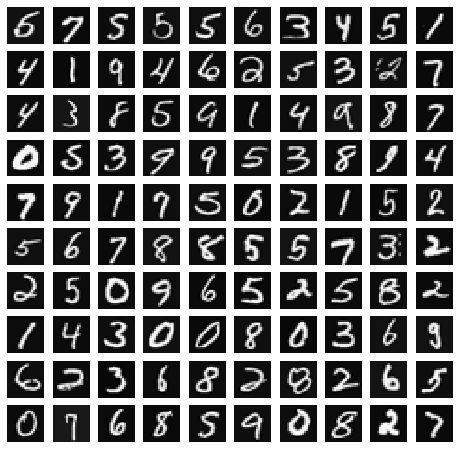

In [6]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(featureset[np.random.randint(0,5001)].reshape(20,20,order="F"), cmap="gray") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

### Multiclass Logistic Regression

In [7]:


def compute_reg_cost_grad(m, X, y, theta, _lambda):
    """ Compute the regularized cost and gradient. """
#     print('Theta in cost function:', theta)
    z = tf.matmul(X, theta)
    hx = tf.sigmoid(z)
    error = -y * tf.log(hx) - (1-y) * tf.log(1-hx)
    cost = (1/m) * (tf.reduce_sum(error, axis=0))
    reg_term = _lambda/(2*m) * tf.reduce_sum(tf.pow(theta[1:], 2), axis=0)
    reg_cost = cost + reg_term
    grad_0 = 1/m * tf.matmul( tf.transpose( tf.reshape(X[:, 0], (-1,1))), hx-y )
    grad_1 = 1/m * tf.matmul( tf.transpose(X[:, 1:]), hx-y ) + _lambda/m * theta[1:]
    reg_grad = tf.concat((tf.reshape(grad_0, (1, -1)), grad_1), axis=0)
#     print(reg_grad.shape)
    return reg_cost, reg_grad
#     return reg_cost, reg_grad, z, hx, error, cost,grad_0, grad_1

In [8]:
def predictions(X, theta):
    pred = tf.matmul(X, theta)
    return tf.argmax(pred, axis=1)
    

In [9]:
def model(m, X, y, theta, _lambda, lr, itrs):
    costs = []
    
    for i in range(itrs):
        cost, grad = compute_reg_cost_grad(m, X, y, theta, _lambda)
        theta = theta - lr * grad
#         print(theta)
#         print(cost.shape)
        costs.append(cost)
    predicted = predictions(X, theta)
    
    parameters = {
        'costs': costs,
        'theta': theta,
        'predicted': predicted
    }
    return parameters

In [10]:
x_norm = featureset
m = target.shape[0]
n = x_norm.shape[1]
num_label = 10

# Add intercept term to featureset
xtrain = np.hstack( (np.ones((m,1)), x_norm) )

# Create one hot vector
target = np.where(target==10, 0, target) # setting label 0 for 0 instead of 10
ytrain = np.identity(num_label)[target.flatten()]

lr = 0.8
_lambda = 0.1
itrs = 400

In [11]:
# Create Placeholders
X = tf.placeholder(tf.float32, xtrain.shape)
y = tf.placeholder(tf.float32, ytrain.shape)

# Parameter initializer
theta = tf.Variable(tf.zeros(dtype=tf.float32, shape=(n+1, num_label)))

# Create graph
training = model(m, X, y, theta, _lambda, lr, itrs )

In [12]:
# Run graph
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    results = sess.run(training, feed_dict={X:xtrain, y:ytrain})


Text(0.5, 1.0, 'Cost vs iterations')

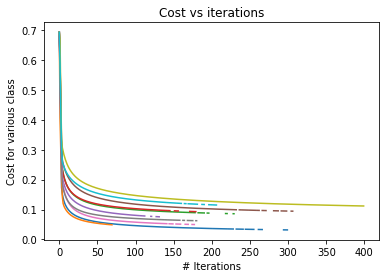

In [13]:
plt.plot(results['costs'])
plt.xlabel('# Iterations')
plt.ylabel('Cost for various class')
plt.title('Cost vs iterations')

#### Accuracy Calculations

In [14]:
print("Accuracy on taining set: ", np.mean(results['predicted']==target.flatten()))


Accuracy on taining set:  0.9166
